In [6]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [12]:
# example of plotting gradient descent with momentum for a one-dimensional function

# objective function
def objective(x, y):
    return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
    return np.asarray([x * 2.0, y * 2.0])



400


C:\Users\tanni\AppData\Local\Temp\ipykernel_14024\622059578.py:13: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



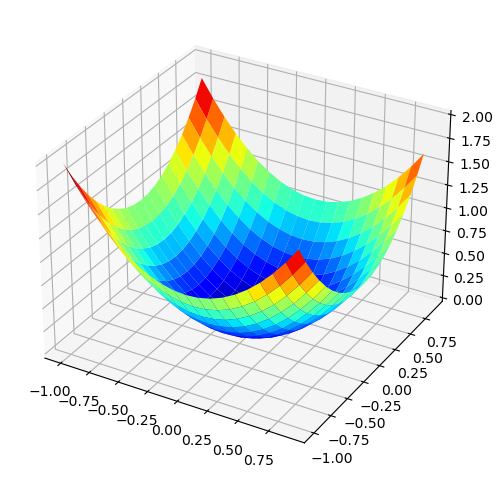

In [54]:
# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = np.meshgrid(xaxis, yaxis)
print(np.size(x))
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = plt.figure(figsize=(6,6))
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
plt.show()

In [39]:
def plot_solutions(solutions,titlestr):
    # sample input range uniformly at 0.1 increments
    xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
    yaxis = np.arange(bounds[1,0], bounds[1,1], 0.1)
    # create a mesh from the axis
    x, y = np.meshgrid(xaxis, yaxis)
    # compute targets
    results = objective(x, y)
    # create a filled contour plot with 50 levels and jet color scheme
    plt.contourf(x, y, results, levels=50, cmap='jet')
    # plot the sample as black circles
    solutions = np.asarray(solutions)
    plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
    # show the plot
    plt.title(titlestr)
    plt.show()

In [ ]:
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
    solutions = list()
    # generate an initial point
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
	# keep track of the change
    change = 0.0
	# run the gradient descent
    for t in range(n_iter):
		# calculate gradient
        gradient = derivative(x[0], x[1])
        for i in range(x.shape[0]):
		# calculate update
            new_change = step_size * gradient[i] + momentum * change
            
		# take a step
            x[i] = x[i] - new_change
		# save the change
            change = new_change
		# evaluate candidate point
        
            solution_eval = objective(x[0], x[1])
		# store solution
            solutions.append(x.copy())
            #scores.append(solution_eval)
		# report progress
        print('>%d f(%s) = %.5f' % (t, x, solution_eval))
    return solutions


### Gradient Descent with Momentum

>0 f([0.74724774 0.01952802]) = 0.55876
>1 f([ 0.57531725 -0.03595673]) = 0.33228
>2 f([ 0.44360837 -0.06827805]) = 0.20145
>3 f([ 0.3451903  -0.08414786]) = 0.12624
>4 f([ 0.2713913  -0.08945799]) = 0.08166
>5 f([ 0.21552    -0.08832778]) = 0.05425
>6 f([ 0.17275506 -0.08349171]) = 0.03682
>7 f([ 0.13965487 -0.07672342]) = 0.02539
>8 f([ 0.11375438 -0.06914888]) = 0.01772
>9 f([ 0.09327587 -0.06146266]) = 0.01248
>10 f([ 0.07692656 -0.05407492]) = 0.00884
>11 f([ 0.06375757 -0.04721063]) = 0.00629
>12 f([ 0.05306534 -0.04097618]) = 0.00449
>13 f([ 0.04432261 -0.03540376]) = 0.00322
>14 f([ 0.03712981 -0.03048085]) = 0.00231
>15 f([ 0.03118073 -0.0261694 ]) = 0.00166
>16 f([ 0.02623801 -0.02241834]) = 0.00119
>17 f([ 0.02211573 -0.01917135]) = 0.00086
>18 f([ 0.01866668 -0.0163718 ]) = 0.00062
>19 f([ 0.01577321 -0.01396548]) = 0.00044
>20 f([ 0.01334046 -0.01190221]) = 0.00032
>21 f([ 0.01129135 -0.0101365 ]) = 0.00023
>22 f([ 0.00956279 -0.00862777]) = 0.00017
>23 f([ 0.00810286 -0.0

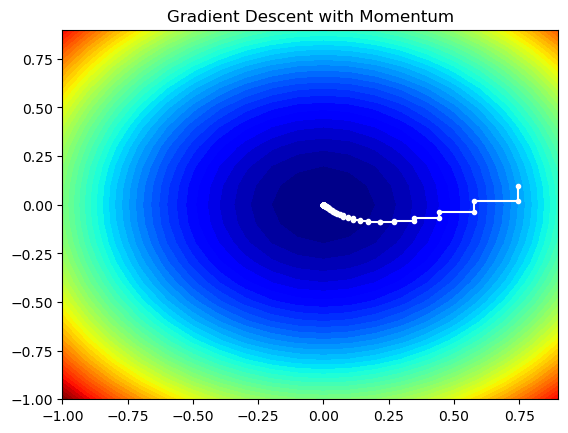

In [40]:
# seed the pseudo random number generator
np.random.seed(4)
# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
plot_solutions(solutions,"Gradient Descent with Momentum")

In [19]:
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
 # generate an initial point
    solutions = list()
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
 # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
 # run the gradient descent updates
    for t in range(n_iter):
 # calculate gradient g(t)
        g = derivative(x[0], x[1])
     # build a solution one variable at a time
        for i in range(x.shape[0]):
         # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
         # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
         # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
         # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
         # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (np.sqrt(vhat) + eps)
         # evaluate candidate point
            score = objective(x[0], x[1])
            solutions.append(x.copy())
         # report progress
            print('>%d f(%s) = %.5f' % (t, x, score))
    return solutions

### Adam

>0 f([-0.14595599  0.44064899]) = 0.21547
>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.42064899]) = 0.19286
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.40070573]) = 0.17194
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3808601 ]) = 0.15275
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.3611548 ]) = 0.13526
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.34163405]) = 0.11944
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.32234308]) = 0.10522
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.30332769]) = 0.09248
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.28463383]) = 0.08109
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.26630707]) = 0.07092
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.24839209]) = 0.06182
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.23093228]) = 0.05364
>11 f([0.01759677 0.2139692 ]) = 0.04609


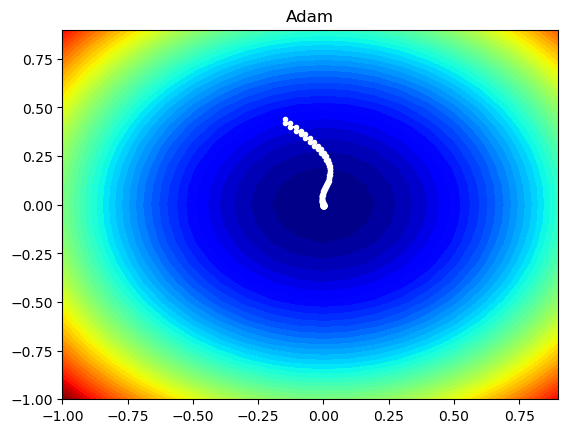

In [41]:
# seed the pseudo random number generator
np.random.seed(1)
# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
plot_solutions(solutions,"Adam")

In [28]:
# gradient descent algorithm with rmsprop
def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
 # track all solutions
    solutions = list()
     # generate an initial point
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
 # list of the average square gradients for each variable
    sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
 # run the gradient descent
    for it in range(n_iter):
 # calculate gradient
        gradient = derivative(x[0], x[1])
 # update the average of the squared partial derivatives
        for j in range(gradient.shape[0]):
 # calculate the squared gradient
            sg = gradient[j]**2.0
 # update the moving average of the squared gradient
            sq_grad_avg[j] = (sq_grad_avg[j] * rho) + (sg * (1.0-rho))# build solution
            new_solution = list()
            for i in range(x.shape[0]):# calculate the learning rate for this variable
                alpha = step_size / (1e-8 + np.sqrt(sq_grad_avg[j]))
 # calculate the new position in this variable
                value = x[i] - alpha * gradient[j]
                new_solution.append(value)# store the new solution
                solution = np.asarray(new_solution)
        solutions.append(solution)
 # evaluate candidate point
        solution_eval = objective(solution[0], solution[1])# report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return solutions


### Rmsprop

>0 f([-0.26595598  0.340649  ]) = 0.18677
>1 f([-0.23684411  0.36976087]) = 0.19282
>2 f([-0.2239809   0.38262408]) = 0.19657
>3 f([-0.21633271  0.39027227]) = 0.19911
>4 f([-0.2111268   0.39547818]) = 0.20098
>5 f([-0.20729389  0.39931109]) = 0.20242
>6 f([-0.20432268  0.4022823 ]) = 0.20358
>7 f([-0.20193389  0.40467109]) = 0.20454
>8 f([-0.1999604   0.40664458]) = 0.20534
>9 f([-0.19829527  0.40830971]) = 0.20604
>10 f([-0.19686649  0.40973849]) = 0.20664
>11 f([-0.19562356  0.41098142]) = 0.20717
>12 f([-0.19452987  0.41207511]) = 0.20765
>13 f([-0.19355817  0.41304681]) = 0.20807
>14 f([-0.19268769  0.41391729]) = 0.20846
>15 f([-0.19190227  0.41470271]) = 0.20880
>16 f([-0.19118915  0.41541583]) = 0.20912
>17 f([-0.19053809  0.41606688]) = 0.20942
>18 f([-0.18994078  0.4166642 ]) = 0.20969
>19 f([-0.18939036  0.41721462]) = 0.20994
>20 f([-0.18888115  0.41772383]) = 0.21017
>21 f([-0.18840838  0.41819659]) = 0.21039
>22 f([-0.18796802  0.41863695]) = 0.21059
>23 f([-0.18755664  0

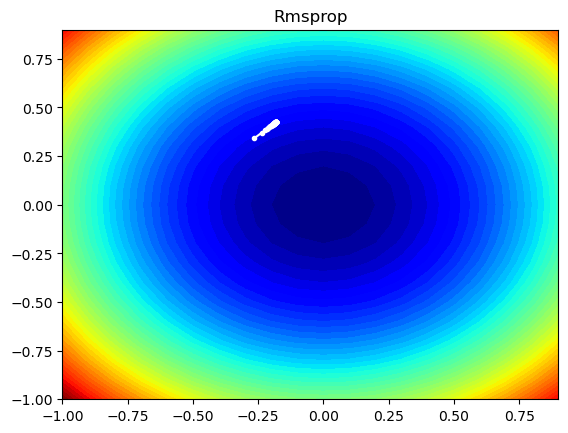

In [43]:
# seed the pseudo random number generator
np.random.seed(1)
# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# define the step size
step_size = 0.01
# momentum for rmsprop
rho = 0.99
# perform the gradient descent search with rmsprop
solutions = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)
plot_solutions(solutions,"Rmsprop")

In [36]:
# gradient descent algorithm with adamax
def adamax(objective, derivative, bounds, n_iter, alpha, beta1, beta2):
	solutions = list()
	# generate an initial point
	x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# initialize moment vector and weighted infinity norm
	m = [0.0 for _ in range(bounds.shape[0])]
	u = [0.0 for _ in range(bounds.shape[0])]
	# run iterations of gradient descent
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(x[0], x[1])
		# build a solution one variable at a time
		for i in range(x.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
			# u(t) = max(beta2 * u(t-1), abs(g(t)))
			u[i] = max(beta2 * u[i], abs(g[i]))
			# step_size(t) = alpha / (1 - beta1(t))
			step_size = alpha / (1.0 - beta1**(t+1))
			# delta(t) = m(t) / u(t)
			delta = m[i] / u[i]
			# x(t) = x(t-1) - step_size(t) * delta(t)
			x[i] = x[i] - step_size * delta
		# evaluate candidate point
		score = objective(x[0], x[1])
		solutions.append(x.copy())
		# report progress
		print('>%d f(%s) = %.5f' % (t, x, score))
	return solutions



### Adamax

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12710654  0.40095637]) = 0.17692
>2 f([-0.10946453  0.38160729]) = 0.15761
>3 f([-0.09307535  0.36263664]) = 0.14017
>4 f([-0.07797164  0.34407763]) = 0.12447
>5 f([-0.06417238  0.32596131]) = 0.11037
>6 f([-0.0516824   0.30831621]) = 0.09773
>7 f([-0.04049225  0.2911681 ]) = 0.08642
>8 f([-0.03057849  0.27453966]) = 0.07631
>9 f([-0.02190445  0.25845039]) = 0.06728
>10 f([-0.01442115  0.2429165 ]) = 0.05922
>11 f([-0.00806872  0.22795085]) = 0.05203
>12 f([-0.00277794  0.21356301]) = 0.04562
>13 f([0.00152809 0.19975935]) = 0.03991
>14 f([0.00493204 0.18654317]) = 0.03482
>15 f([0.00752057 0.17391486]) = 0.03030
>16 f([0.00938247 0.16187209]) = 0.02629
>17 f([0.01060693 0.15041003]) = 0.02274
>18 f([0.01128195 0.1395216 ]) = 0.01959
>19 f([0.01149284 0.12919765]) = 0.01682
>20 f([0.01132104 0.11942723]) = 0.01439
>21 f([0.01084297 0.11019782]) = 0.01226
>22 f([0.01012927 0.10149551]) = 0.01040
>23 f([0.00924413 0.09330524]) = 0.00879


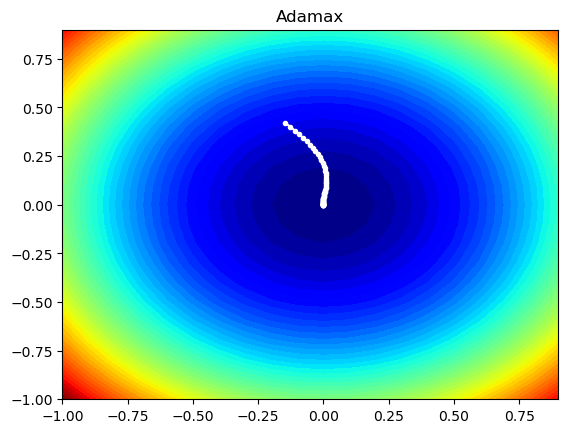

In [44]:
# seed the pseudo random number generator
np.random.seed(1)
# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.99
# perform the gradient descent search with adamax
solutions = adamax(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
plot_solutions(solutions,"Adamax")

In [50]:
import plotly.express as px
df = px.data.tips()

fig = px.density_contour(df, x="total_bill", y="tip", z="size" )
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [53]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
